In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [66]:
df = pd.read_csv("Salary_Data.csv")
df.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [67]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,df.shape[1]-1].values

In [33]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
LR = LinearRegression()
model = LR.fit(X_train,y_train)

In [70]:
predict = model.predict(X_test)

In [71]:
plt.style.available[:5]

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight']

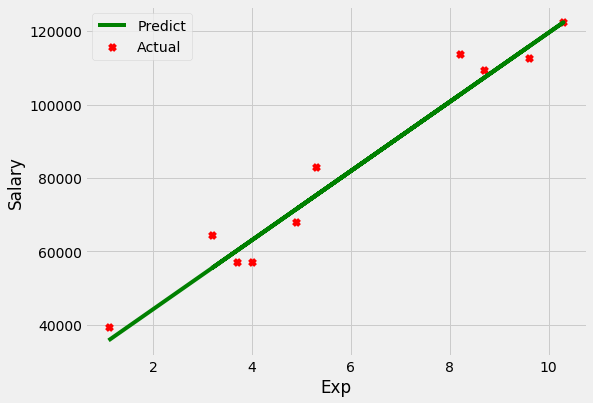

In [72]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
plt.scatter(X_test,y_test,c='r',marker='x',label='Actual')
plt.plot(X_test,predict,label="Predict",color='g')
plt.xlabel('Exp')
plt.ylabel("Salary")
plt.legend(loc='upper left')
plt.show()

In [73]:
model.score(X_test,y_test)

0.9553063138044949

In [74]:
sc_y.inverse_transform(y_test)

array([3.03600040e+09, 1.83125309e+09, 3.06772485e+09, 2.23960089e+09,
       1.73710399e+09, 1.54152831e+09, 3.29896021e+09, 2.94964090e+09,
       1.53527506e+09, 1.06051346e+09])

In [57]:
sc_y.inverse_transform(predict)

array([[115814.30756236],
       [ 71511.92534771],
       [102617.85328566],
       [ 75282.34085534],
       [ 55487.65944028],
       [ 60200.67882482],
       [122412.53470072],
       [107330.8726702 ],
       [ 63028.49045554],
       [ 35692.97802523]])

In [76]:
m = y_test.size
error_scale = (1/(2*m))*np.sum(np.square(sc_y.inverse_transform(predict)-sc_y.inverse_transform(y_test)))
error_scale

1.282340173964414e+16

In [75]:
m = y_test.size
error_no_scale = (1/(2*m))*np.sum(np.square(predict-y_test))
error_no_scale

17650949.44356745

## Without scaling error is less in Linear Regression